## 寻找配对
- 根据累积收益率最小距离筛选pairs

In [6]:
import pickle
from itertools import combinations
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv("data/preprocessed.csv")
with open("data/cumReturn.bin", "rb") as f:
    returns = pickle.load(f)

In [3]:
data.head()

,date,asset,close,volume
0,2017-01-03,LLDPE,9710.0,415780.0
1,2017-01-03,PTA,5446.0,2106438.0
2,2017-01-03,动力煤,493.0,102390.0
3,2017-01-03,天然橡胶,18360.0,352158.0
4,2017-01-03,棉花,15085.0,184116.0


In [8]:
assets = returns.keys()

In [11]:
def calSSD(x1, x2):
    '''
    @Description
    计算两个序列的距离，返回square sum of deviation
    ------------
    @Params
    x1, x2, Series
    ------------
    @Returns
    ssd, float
    '''
    return np.sum((x1-x2)**2)

In [17]:
def normalize(x):
    '''
    @Description
    min-max归一
    ------------
    @Params
    x, Series
    ------------
    @Returns
    x1, Series
    '''
    return (x-x.min())/(x.max()-x.min())

In [63]:
# 指定形成期12个月
dates = data["date"].unique()

In [65]:
len(dates)

1075

In [69]:
sum(dates<"2018-01-03")

245

In [70]:
# 两两组合计算SSD
SSDs = {}
for asset1, asset2 in combinations(assets, 2):
    return1 = normalize(returns[asset1].dropna().values[:245])
    return2 = normalize(returns[asset2].dropna().values[:245])
    SSDs[f"{asset1}-{asset2}"] = calSSD(return1, return2)

In [72]:
min(SSDs,key=SSDs.get)

'热轧卷板-螺纹钢'

In [73]:
SSDs["热轧卷板-螺纹钢"]

2.0965845977013613

In [93]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
zhfont = FontProperties(fname="/System/Library/Fonts/PingFang.ttc")

In [77]:
data[data["asset"]=="热轧卷板"].iloc[:245,:]

,date,asset,close,volume
6,2017-01-03,热轧卷板,3298.0,251094.0
41,2017-01-04,热轧卷板,3370.0,359388.0
76,2017-01-05,热轧卷板,3358.0,305690.0
111,2017-01-06,热轧卷板,3273.0,427108.0
146,2017-01-09,热轧卷板,3449.0,361934.0
...,...,...,...,...
8406,2017-12-26,热轧卷板,3870.0,542832.0
8441,2017-12-27,热轧卷板,3857.0,681648.0
8476,2017-12-28,热轧卷板,3848.0,617426.0
8511,2017-12-29,热轧卷板,3846.0,772990.0


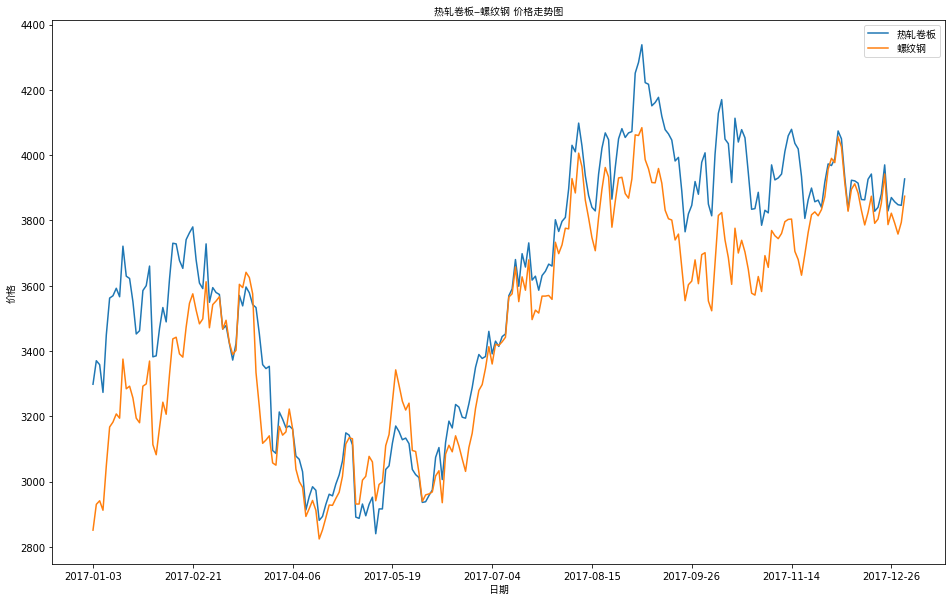

In [98]:
fig, ax = plt.subplots(figsize=(16, 10))
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = ['SimHei']
d1 = data[data["asset"]=="热轧卷板"].iloc[:245,:]
d2 = data[data["asset"]=="螺纹钢"].iloc[:245, :]
ax.plot(d1.date, d1.close, label=u"热轧卷板")
ax.plot(d2.date, d2.close, label=u"螺纹钢")
# plt.tight_layout()
ax.legend(prop=zhfont)
ax.set_xlabel(u"日期", fontproperties=zhfont)
ax.set_ylabel(u"价格", fontproperties=zhfont)
ax.set_title(u"热轧卷板-螺纹钢 价格走势图", fontproperties=zhfont)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(30))
plt.show()